In [1]:
# Ecological scenarios do not depend just on relative basic reproduction numbers of strains R0,1 and R0,2.
# We compare the case of large variation in clearance rate between two strains
# ν1 = −1 , ν2= 1 (a) with lower one ν1 = −0.25, ν2 = 0.25 (b).
import numpy as np
import matplotlib.pyplot  as  plt
import matplotlib.cm as cm

np.set_printoptions(linewidth = 130, precision = 13)
%matplotlib inline
from matplotlib import colors

In [3]:
def fitness(del_b, del_nu): #gamma_ij = min{gamma_i, gamma_j}, k_{ij} = k
    mu = 1/(k*(R0 - 1))
    
    #lambda^2_1 + lambda^1_2
    lambd21 =  gamm/(2*(gamm + r))*(2*mu**2 + 3*mu + 2)/((mu + 1)**2)*del_nu + del_b
    lambd12 = -gamm/(2*(gamm + r))*(2*mu**2 +   mu    )/((mu + 1)**2)*del_nu - del_b
    
    return lambd21, lambd12

def outcome(L21, L12): #Compute the value E1, E2, B, C for each value (\Delta \nu, \Delta b)
    pos1 = L21 > 0
    pos2 = L12 > 0
    neg1 = L21 < 0
    neg2 = L12 < 0

    #matrix of scenarios
    coex = (-10)*pos1*pos2
    s1 = -2*pos1*neg2
    s2 =  2*neg1*pos2
    bista =   10*neg1*neg2
    scen = coex + s1 + s2 + bista
    return scen

def matrix_b(v1, v2):
    # compute matrix of delta b
    delb_arr = np.zeros((t,t))

    for i in range (0, t):
        for j in range (0, t):
            b1 = -beta/eps + X[i]*(m/eps + v1*gamm)
            b2 = -beta/eps + Y[j]*(m/eps + v2*gamm)
            delb_arr[i,j] = (b1 - b2)/beta
    return delb_arr

In [4]:
# neutral parameters
k = 0.5
gamm = 1
r = 0.5
m = 1.5
beta = 6
eps = 0.1
R0 = beta/m
#matrices X: R_01, Y: R_02
X = np.linspace(4, 5, 1000)
Y = np.linspace(5, 4, 1000)
x, y = np.meshgrid(X, Y)
t = len(X)

# Compute ultimate outcome for each pair of (\Delta\nu, \Delta b)
### CASE 1: v1 = -1, v2 = 1
v1 = -1
v2 = 1
del_nu = v2 - v1
delb_arr = matrix_b(v1, v2)
L21, L12  = fitness(delb_arr, del_nu)
scen1 = outcome(L21, L12)

### CASE 1: v1 = -0.25, v2 = 0.25
v1 = -0.25
v2 = 0.25
del_nu = v2 - v1
delb_arr = matrix_b(v1, v2)
L21, L12  = fitness(delb_arr, del_nu)
scen2 = outcome(L21, L12)

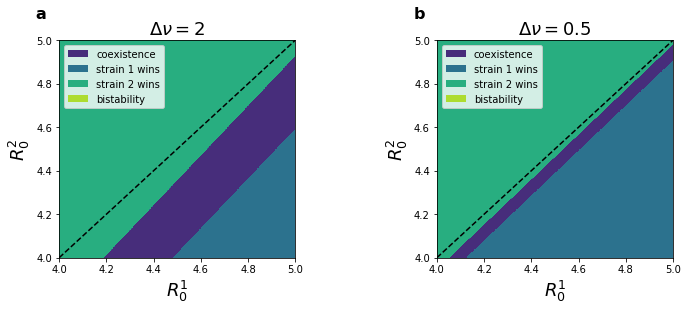

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (11,4))
fig.subplots_adjust(wspace = 0.6)

ax1.contourf(x, y, scen1, levels = [-10,-5, 0, 5,10])
ax1.plot(X,X, 'k--', label = '$R^1_0 = R^2_0$')
ax1.legend(loc='upper right')
ax1.set_ylabel('$R^2_0$', fontsize = 18)
ax1.set_xlabel('$R^1_0$', fontsize = 18)
ax1.text(-0.1, 1.1, 'a', transform=ax1.transAxes, size=16, weight='bold')
ax1.set_title('$\\Delta \\nu = 2$', fontsize = 18)

ax2.contourf(x, y, scen2, levels = [-10,-5, 0, 5,10])
ax2.plot(X, X, 'k--', label = '$R^1_0 = R^2_0$')
ax2.legend(loc='upper right')
ax2.set_ylabel('$R^2_0$', fontsize = 18)
ax2.set_xlabel('$R^1_0$', fontsize = 18)
ax2.text(-0.1, 1.1, 'b', transform=ax2.transAxes, size=16, weight='bold')
ax2.set_title('$\\Delta \\nu = 0.5$', fontsize = 18)

proxy = [plt.Rectangle((0,0),1,1, fc = pc.get_facecolor()[0]) for pc in ax1.collections]
ax1.legend(proxy, ['coexistence', 'strain 1 wins', 'strain 2 wins', 'bistability'], loc = 'upper left')
ax2.legend(proxy, ['coexistence', 'strain 1 wins', 'strain 2 wins', 'bistability'], loc = 'upper left')